In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [52]:
import random
import pandas as pd
import numpy as np
from scipy import stats

In [74]:
# 1) Import and store the data in a data frame.
bc = pd.read_csv("wisc_bc_data.csv")
bc.shape
bc.dtypes

(569, 32)

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [75]:
bc.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.19580,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
5,86208,M,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,...,24.22,31.59,156.10,1750.0,0.11900,0.35390,0.4098,0.15730,0.3689,0.08368
6,86211,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,...,12.83,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
7,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.9608,0.29100,0.4055,0.09789
8,86408,B,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.2216,0.11050,0.2226,0.08486
9,86409,B,14.26,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,...,15.30,23.73,107.00,709.0,0.08949,0.41930,0.6783,0.15050,0.2398,0.10820


In [76]:
# Remove the outliers from the data (4 points)
bc_o = bc[(np.abs(stats.zscore(bc.select_dtypes(exclude='object'))) < 3 ).all(axis=1)]
bc_o.shape
bc_o.head()

(487, 32)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [77]:
# 3) Treat “diagnosis” – 2nd Column as your Dependent Variable and Rest of the columns as Independent Variable and split the table.
bc_o_feature = bc_o.drop(labels = "diagnosis", axis = 1)
bc_o_feature.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [78]:
# Drop "id" column from independent variables (2 point)
bc_o_feature = bc_o_feature.drop(labels = "id", axis = 1)
bc_o_feature.head()
bc_o_feature.shape

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


(487, 30)

In [79]:
# Convert Categorical values("M" and "B") of Dependent Variable -Y into numerical value ("1" and "0") respectively (2 points)
bc_o.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [80]:
bc_o['diagnosis'] = bc_o.diagnosis.astype('category')
bc_o.dtypes
def category_to_numeric(x):
   if x=='B':
       return 0
   if x=='M':
       return 1
    
    
bc_o['diagnosis'] = bc_o['diagnosis'].apply(category_to_numeric)
bc_o

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,...,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
1,8913,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
2,8915,0,14.96,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,...,16.250,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472
3,9047,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
4,85715,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
5,86208,1,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.220,31.59,156.10,1750.0,0.11900,0.35390,0.40980,0.15730,0.3689,0.08368
6,86211,0,12.18,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376
8,86408,0,12.63,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
10,86517,1,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.145700,0.086650,...,22.250,24.90,145.40,1549.0,0.15030,0.22910,0.32720,0.16740,0.2894,0.08456
11,86561,0,13.85,17.21,88.44,588.7,0.08785,0.06136,0.014200,0.011410,...,15.490,23.58,100.30,725.9,0.11570,0.13500,0.08115,0.05104,0.2364,0.07182


In [67]:
bc_o.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,NaN,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,NaN,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,NaN,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,NaN,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,NaN,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [81]:
# Drop the independent variables which has less than 0.1 correlation with the dependent variable (3 points)
bc_o_feature.var()

radius_mean               9.132517
texture_mean             15.810933
perimeter_mean          426.942700
area_mean             80954.201611
smoothness_mean           0.000164
compactness_mean          0.001692
concavity_mean            0.003813
points_mean               0.001053
symmetry_mean             0.000531
dimension_mean            0.000030
radius_se                 0.040911
texture_se                0.214548
perimeter_se              1.962644
area_se                 740.380931
smoothness_se             0.000006
compactness_se            0.000161
concavity_se              0.000314
points_se                 0.000023
symmetry_se               0.000037
dimension_se              0.000003
radius_worst             16.861501
texture_worst            32.294830
perimeter_worst         791.748708
area_worst           201891.419666
smoothness_worst          0.000446
compactness_worst         0.015879
concavity_worst           0.029385
points_worst              0.003365
symmetry_worst      

In [83]:
bc_o_feature = bc_o_feature.loc[:, bc_o_feature.var() > 0.1 ]
bc_o_feature.shape

(487, 11)

In [85]:
# Create scatter Plot of Independent Variable vs Dependent Variable. (2 points)
bc_o_pp=bc_o.drop(labels = "id", axis = 1)

bc_o_pp=bc_o_pp.loc[:, bc_o_pp.var() > 0.1]

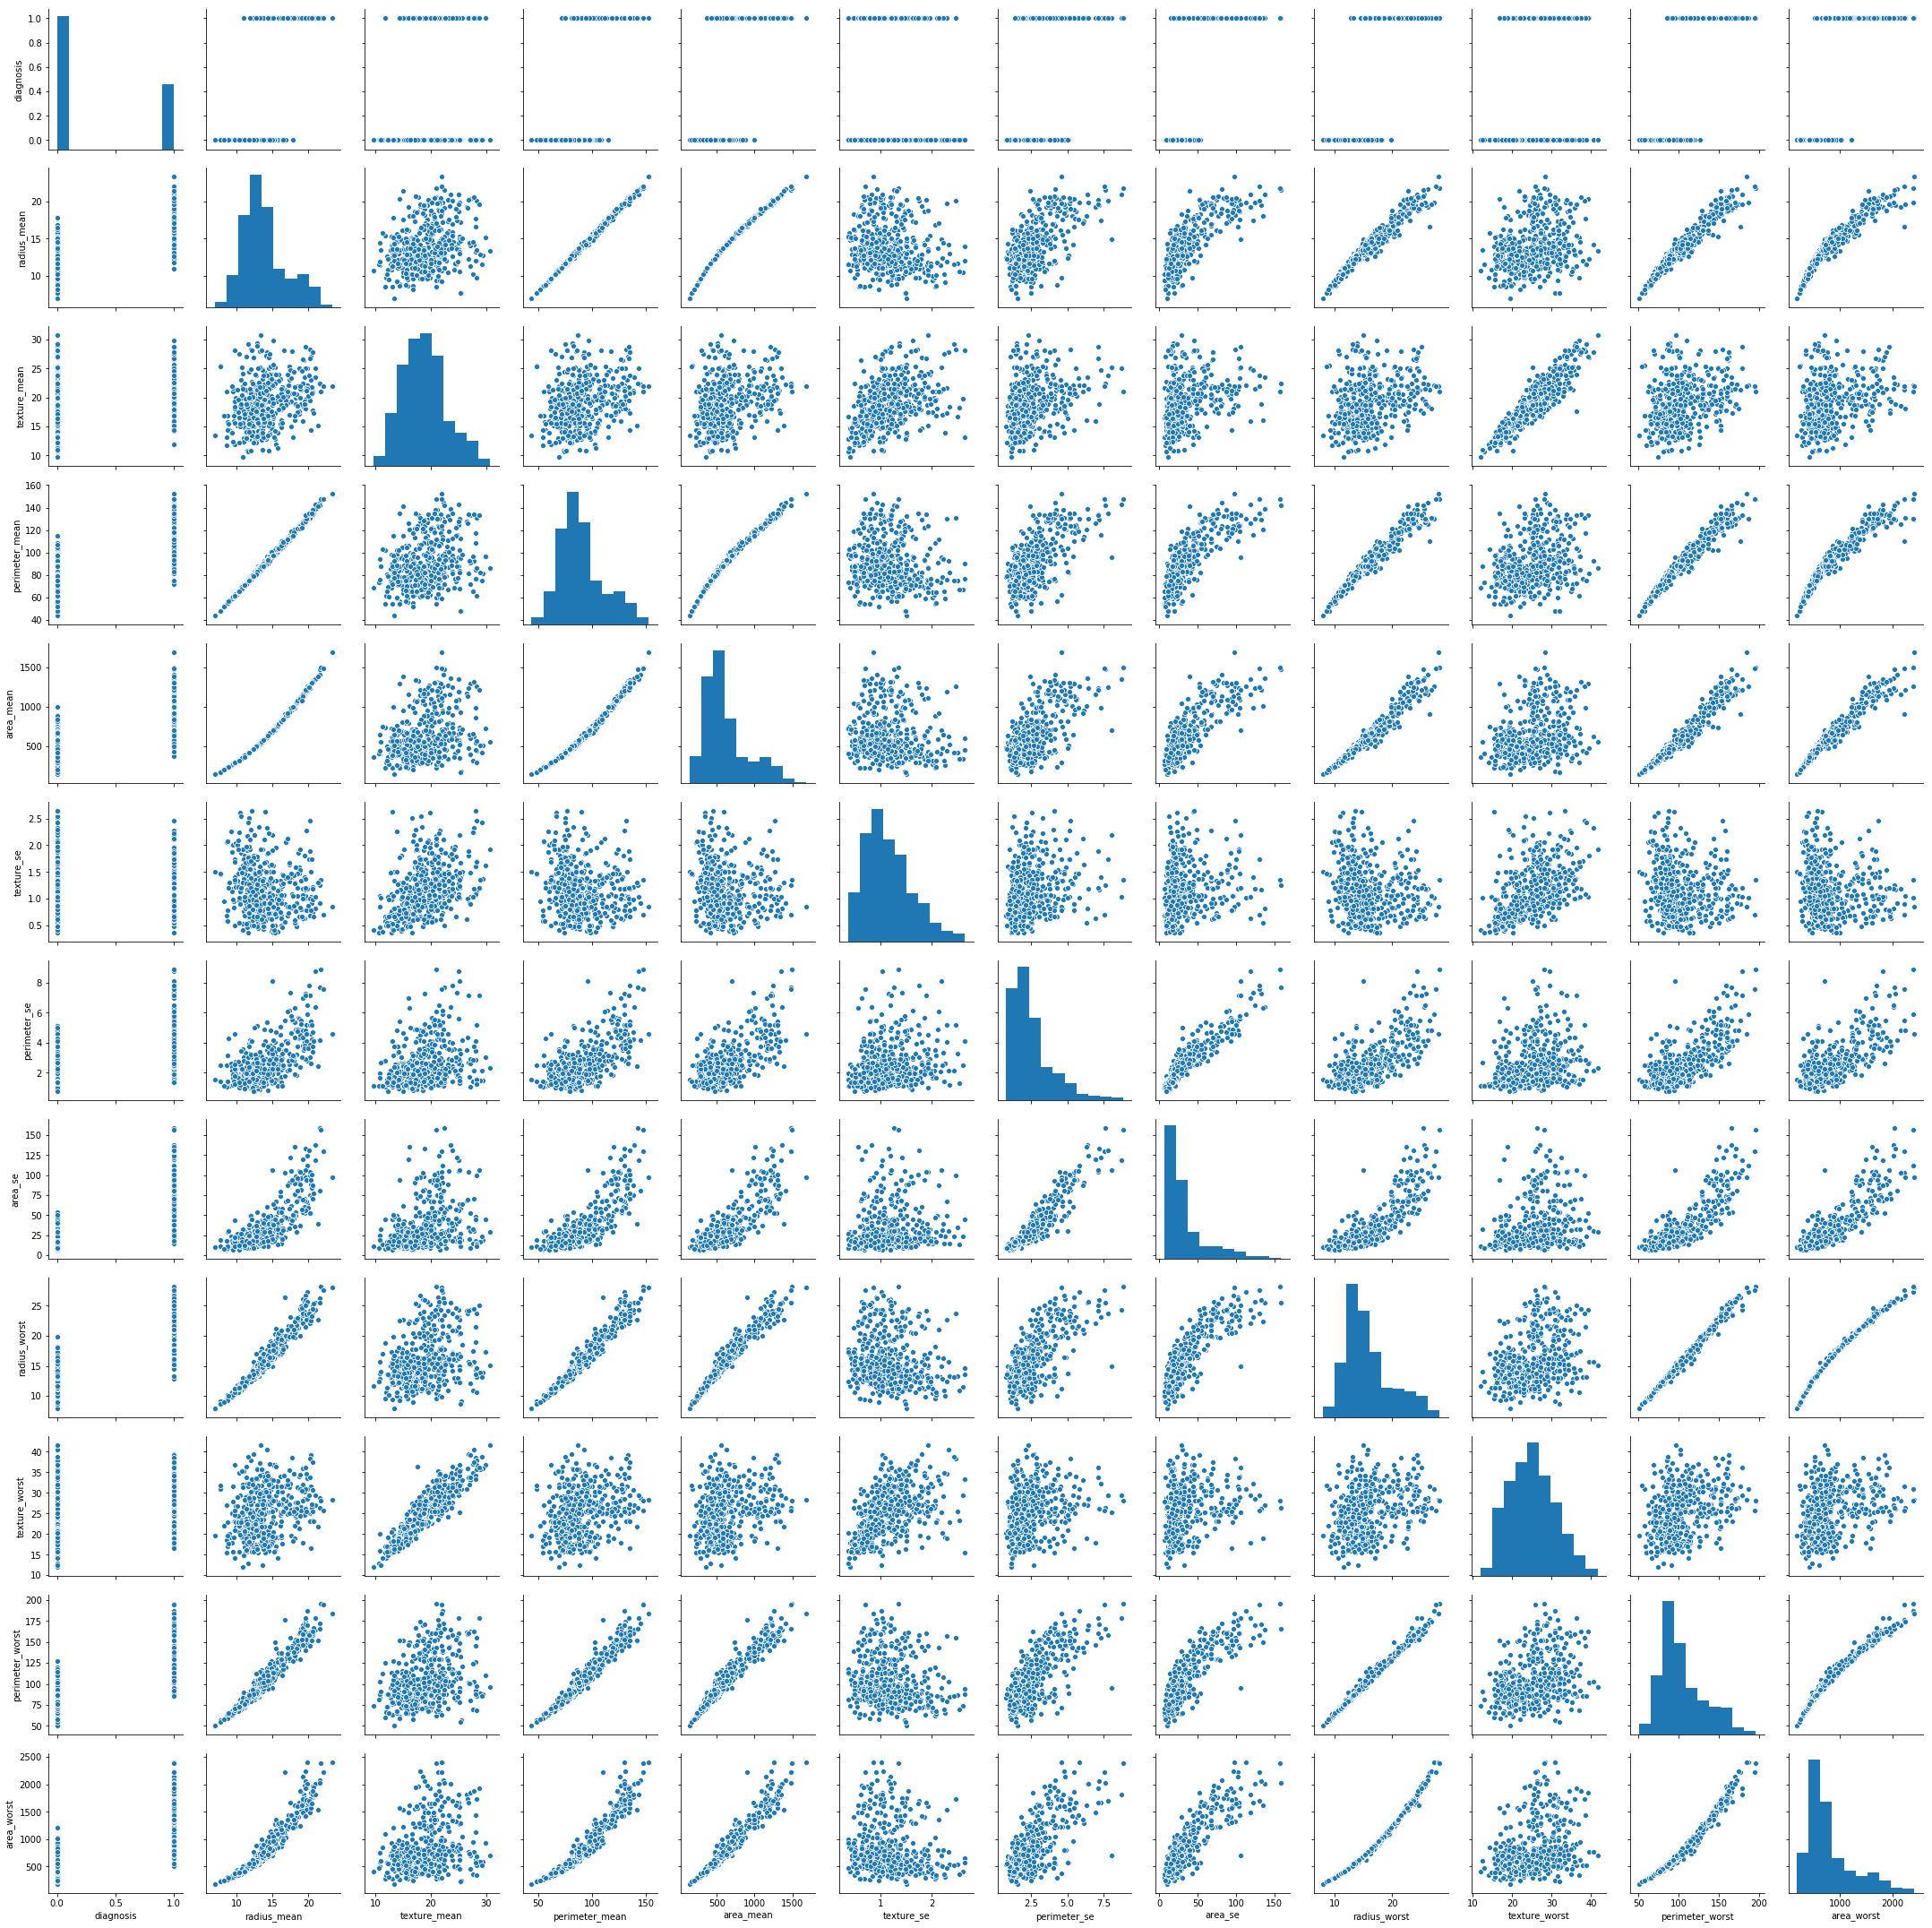

In [87]:
sns.pairplot(bc_o_pp)

In [89]:
# Divide the data set into training and test data set and build a KNN model. (5 points)
bc_o_feature_z = bc_o_feature.apply(stats.zscore)  # convert all attributes to Z scale 

bc_o_feature_z.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
count,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02
mean,-4.044221e-16,-4.244836e-16,-1.173827e-15,-7.648456e-17,3.542683e-16,1.101104e-16,-1.837453e-16,2.305366e-16,2.256922e-16,-2.832978e-16,3.199015e-16
std,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00
min,-2.276447e+00,-2.304567e+00,-2.230889e+00,-1.679399e+00,-1.713130e+00,-1.275482e+00,-9.970823e-01,-1.923607e+00,-2.309196e+00,-1.899408e+00,-1.408563e+00
25%,-6.983897e-01,-7.386892e-01,-6.958650e-01,-6.897156e-01,-7.421278e-01,-7.092098e-01,-6.053523e-01,-6.742341e-01,-7.687740e-01,-6.887691e-01,-6.690258e-01
50%,-2.031764e-01,-7.155459e-02,-2.009849e-01,-2.787841e-01,-1.877945e-01,-2.779858e-01,-3.963905e-01,-2.488379e-01,5.400211e-03,-2.565252e-01,-3.284978e-01
75%,4.709099e-01,6.534823e-01,4.971278e-01,3.369096e-01,5.902172e-01,3.443772e-01,2.108130e-01,4.630000e-01,6.641970e-01,4.855826e-01,3.248214e-01
max,3.119224e+00,2.984677e+00,3.016341e+00,3.747501e+00,3.220329e+00,4.519425e+00,4.591103e+00,3.015377e+00,2.903049e+00,3.276491e+00,3.532379e+00


In [90]:
bc_o_labels = bc_o["diagnosis"]

In [91]:
X = np.array(bc_o_feature_z)
X.shape

(487, 11)

In [93]:
y = np.array(bc_o_labels)
y.shape

(487,)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
NNH = KNeighborsClassifier(n_neighbors= 5)

In [95]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [102]:
NNH.score(X_test, y_test)
y_predict = NNH.predict(X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(metrics.confusion_matrix(y_test, y_predict))
accuracy_score(y_test, y_predict, normalize=False)

0.9455782312925171

[[97  2]
 [ 6 42]]


139

In [103]:
# Print the optimal value of K using Mis-classification error and the corresponding accuracy for the model (5 points)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

0.04387063916475675

4

The optimal number of neighbors is 5


(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

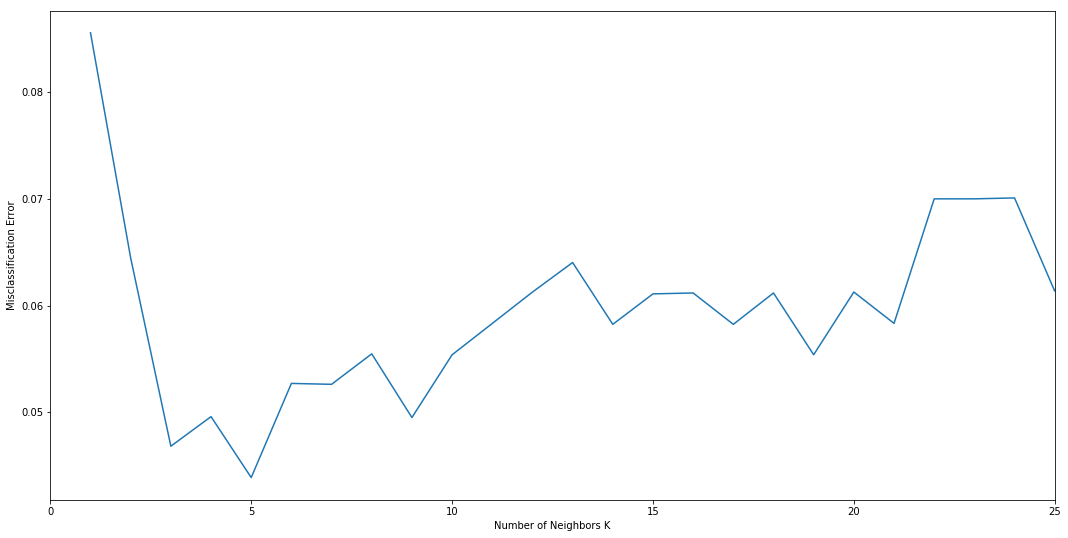

In [99]:
# Plot misclassification error vs k (with k value on X-axis) using matplotlib.(2 points)

%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
